## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [96]:
import pandas as pd
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [97]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.info()  # Analyze the dataframe looking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

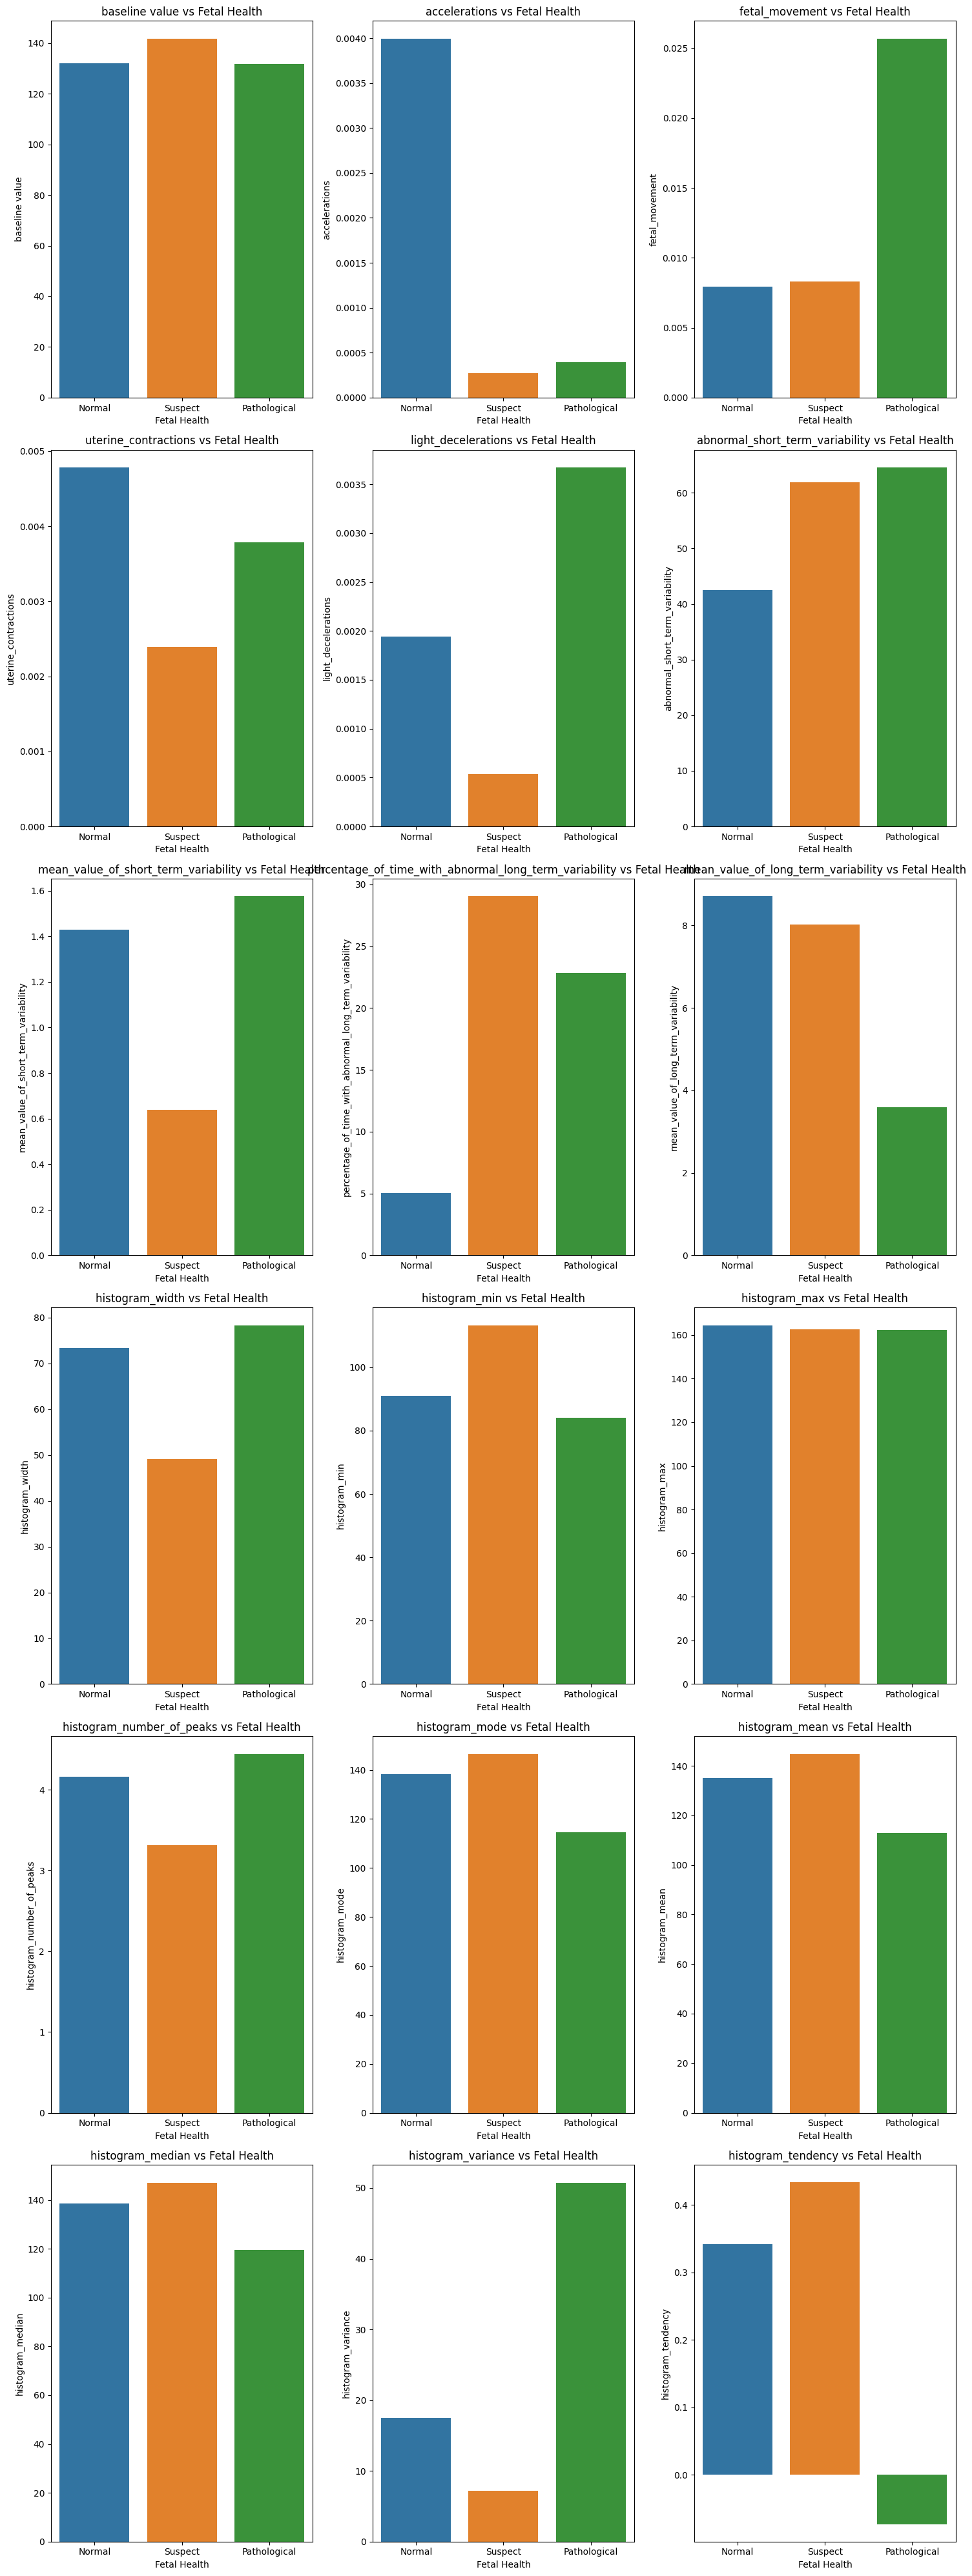

In [98]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 40))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Plot each feature
for i, col in enumerate(X.columns):
    sns.barplot(ax=axes[i], x=df['fetal_health'], y=df[col], ci=None)
    axes[i].set_title(f'{col} vs Fetal Health', fontsize=12)
    axes[i].set_xlabel('Fetal Health')
    axes[i].set_ylabel(col)
    axes[i].set_xticklabels(['Normal', 'Suspect', 'Pathological'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [99]:
# Split the data into features and target variable
# I've decided to drop these features due to their low invariance
X = df.drop(['fetal_health', 'severe_decelerations', 'histogram_number_of_zeroes', 'prolongued_decelerations'], axis=1)
y = df['fetal_health']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=37)

# Confirm the sizes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 17), (426, 17), (1700,), (426,))

Accuracy of K-Nearest Neighbors (mean ± std): 0.9041 ± 0.0123
__________________________________________________________________________________________
              precision    recall  f1-score   support

      Normal       0.93      0.97      0.95      1334
     Suspect       0.74      0.56      0.64       230
Pathological       0.87      0.85      0.86       136

    accuracy                           0.90      1700
   macro avg       0.85      0.79      0.81      1700
weighted avg       0.90      0.90      0.90      1700

__________________________________________________________________________________________


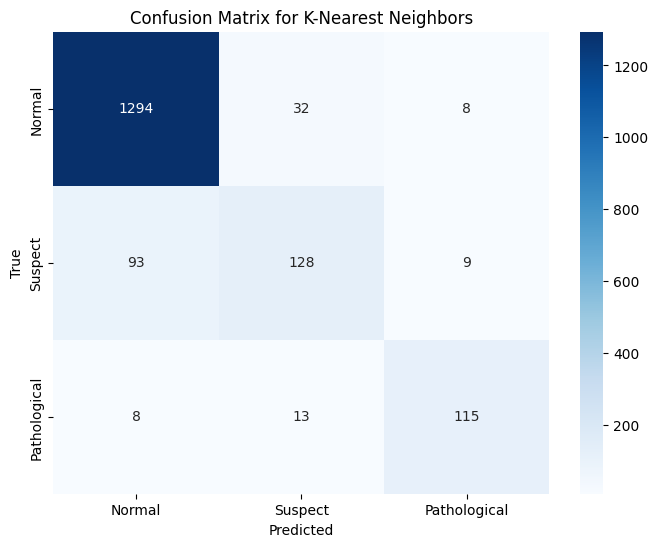

Accuracy of SVC (mean ± std): 0.8518 ± 0.0101
__________________________________________________________________________________________
              precision    recall  f1-score   support

      Normal       0.88      0.97      0.92      1334
     Suspect       0.52      0.35      0.42       230
Pathological       0.91      0.54      0.68       136

    accuracy                           0.85      1700
   macro avg       0.77      0.62      0.68      1700
weighted avg       0.84      0.85      0.84      1700

__________________________________________________________________________________________


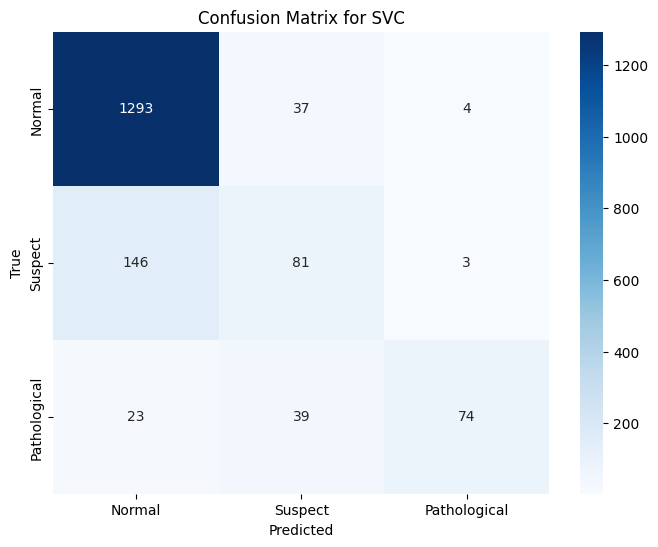

Accuracy of Decision Tree (mean ± std): 0.9176 ± 0.0093
__________________________________________________________________________________________
              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95      1334
     Suspect       0.75      0.68      0.71       230
Pathological       0.93      0.91      0.92       136

    accuracy                           0.92      1700
   macro avg       0.87      0.85      0.86      1700
weighted avg       0.92      0.92      0.92      1700

__________________________________________________________________________________________


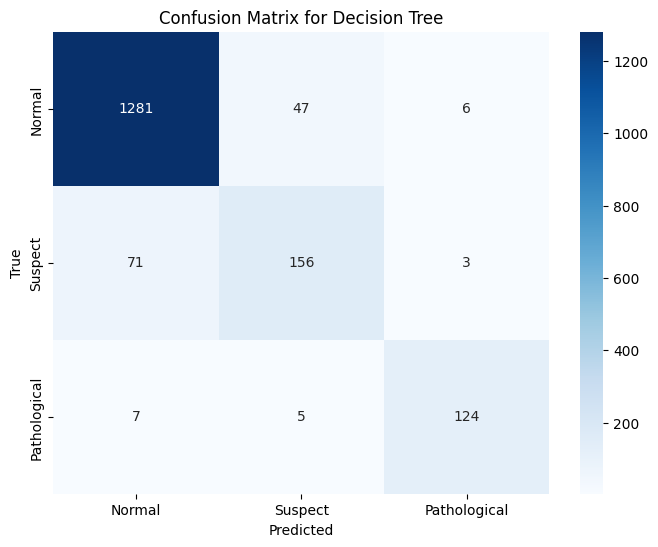

In [100]:
# Initialize the models
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=10)

def evaluate_model(model, X, y, name):
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X, y, cv=5)
    print('='*90)
    print(f"Accuracy of {name} (mean ± std): {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    print('_'*90)
        
    # Generate cross-validated estimates for each input data point
    y_pred = cross_val_predict(model, X, y, cv=5)
    conf_mat = confusion_matrix(y, y_pred)
    
    # Display the classification report
    print(classification_report(y, y_pred, target_names=['Normal', 'Suspect', 'Pathological']))
    print('_'*90)
    print('='*90)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Suspect', 'Pathological'], yticklabels=['Normal', 'Suspect', 'Pathological'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# Evaluate models
evaluate_model(knn, X_train, y_train, "K-Nearest Neighbors")
evaluate_model(svc, X_train, y_train, "SVC")
evaluate_model(decision_tree, X_train, y_train, "Decision Tree")

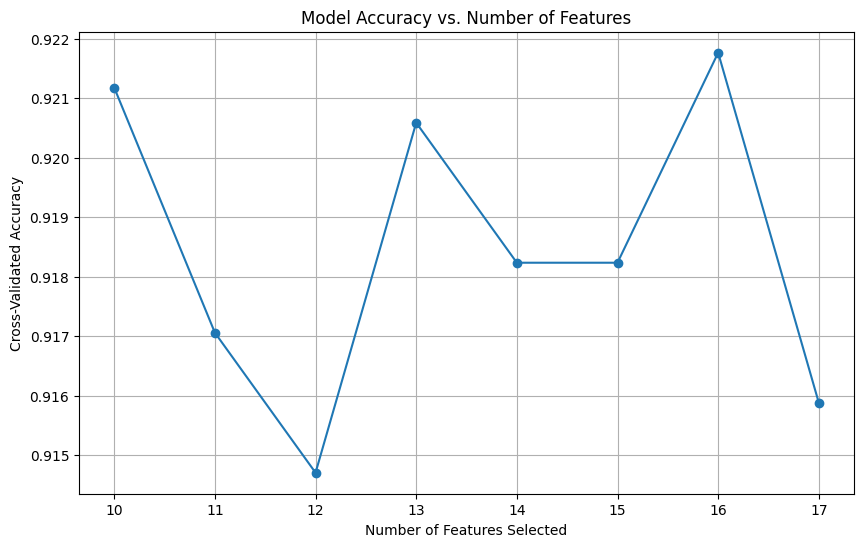

Features selected with 10 features: ['baseline value', 'accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_min', 'histogram_max', 'histogram_mode', 'histogram_mean']
Features selected with 11 features: ['baseline value', 'accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_min', 'histogram_max', 'histogram_mode', 'histogram_mean']
Features selected with 12 features: ['baseline value', 'accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_mode', 'histogram_mean']
Featur

In [115]:
from sklearn.feature_selection import RFE

# Define lists to store results
feature_counts = range(10, X_train.shape[1] + 1)
accuracies = []
selected_features_list = []

# Iteratively perform RFE and evaluate the model
for n_features in feature_counts:
    # Initialize RFE with the specified number of features
    rfe = RFE(estimator=DecisionTreeClassifier(max_depth=10, min_samples_split=7), 
              n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
    # Store the selected features
    selected_features = X_train.columns[rfe.support_]
    selected_features_list.append(selected_features)
    
    # Select the features for training and testing
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)
    
    # Train and evaluate the model using cross-validation
    model = DecisionTreeClassifier(max_depth=15, min_samples_split=7)
    scores = cross_val_score(model, X_train_rfe, y_train, cv=5)
    accuracies.append(np.mean(scores))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracies, marker='o')
plt.title('Model Accuracy vs. Number of Features')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Optionally, print the selected features for each iteration
for count, features in zip(feature_counts, selected_features_list):
    print(f"Features selected with {count} features: {list(features)}")
